# Introducción


En este cuaderno, se resolverá el [TPC01 - Conceptos Básicos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_ConceptosBasicos.pdf). En el mismo se podrán leer los resultados de los ejercicios, el código implementado para la resolución y comentarios sobre las tareas realizadas.
Para cada ejercicio, se requiere trabajar con una base de datos distinta. Algunas redes están dadas por archivos .txt; otras, vienen como archivos .gml. 
[Aquí un enlace a los datos](http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip). Para poder ejecutar el archivo, deben estar subidos al directorio del cuaderno donde se lo abre para poder cargarlo. Hay una celda específica para tal fin. 



In [8]:
#importamos las librerías a utilizar
import networkx as nx
import matplotlib.pylab as plt

#creamos función para abrir .txt
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

# Ejercicio 1
La idea de este ejercicio es indagar en algunas de las características topológicas principales de tres redes de interacción de proteínas de la levadura de cerveza.

## Inciso (a)
En este inciso, queremos simplemente visualizar las tres redes. Para esto, primero, necesitamos generarnos las redes a partir de las listas de enlaces obtenidas de la lectura de los .txt. Luego, podemos generar las visualizaciones con networkx.

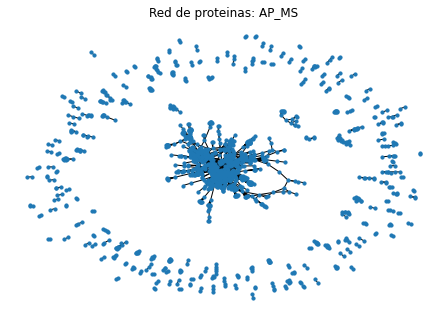

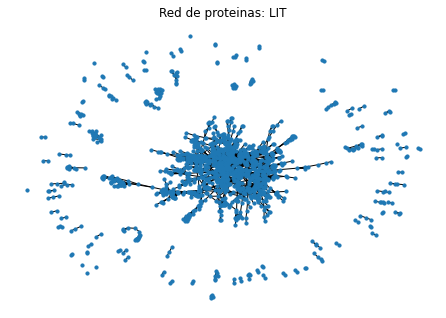

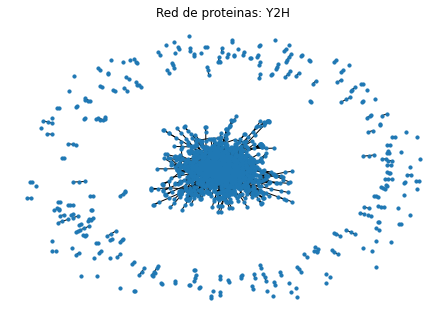

In [3]:
redes = {'AP_MS': './data_01/yeast_AP-MS.txt', 
         'LIT': './data_01/yeast_LIT.txt',
         'Y2H': './data_01/yeast_Y2H.txt'}

data = {}

for i, red in enumerate(redes.keys()):
    lista_de_enlaces_i = abrir_txt(redes[red])
    Red_proteinas_i = nx.Graph()
    Red_proteinas_i.add_edges_from(lista_de_enlaces_i)
    data[red] = {}
    data[red]["Grafo"] = Red_proteinas_i
    nx.draw(Red_proteinas_i, node_size = 10)
    plt.title(f"Red de proteinas: {red}")
    plt.show()


#ACA PODRIAMOS PONERLAS MAS LINDAS (una al lado, etc)


## Inciso (b)
En este inciso buscamos comparar características topológicas de las redes. Para lo mismo creamos un diccionario de diccionarios. Es decir, guardamos en "data" un diccionario para cada red con sus características. Escribimos una función que consigue los atributos pertinentes de cada red. 


In [4]:
def get_red_info(data_dict):
    red = data_dict['Grafo']
    data_dict['Nodos'] = red.number_of_nodes() 
    data_dict['Enlaces'] = red.number_of_edges()
    data_dict['Grado medio'] = 2 * data_dict['Enlaces'] / data_dict['Nodos']
  
    grados = red.degree() # devuelve grado de cada nodo, como tupla
    grado_max = 0 #inicializo en cero
    grado_min = float('inf') #inicializo en infinito
    for nodo in grados:
        if (nodo[1]) > grado_max:
            grado_max = nodo[1]
        if (nodo[1]) < grado_min:
            grado_min = nodo[1]
            
    data_dict['Grado max'] = grado_max
    data_dict['Grado min'] = grado_min
    data_dict['Densidad'] = nx.density(red)

    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    comp_gigante = componentes[0]
    data_dict['Tamaño componente gigante']=comp_gigante.number_of_nodes()
    data_dict['Diametro'] = nx.diameter(comp_gigante)
    data_dict['Clustering medio'] = nx.average_clustering(red)
    data_dict['Clustering delta'] = nx.transitivity(red) #

#Red dirigida/no
#C_DELTA chequear o ponerle un comentario
#cantidad de nodos de cada componenntes



get_red_info(data['AP_MS'])
get_red_info(data['LIT'])
get_red_info(data['Y2H'])

In [31]:
#Ejemplo de como ver la data
data['LIT']['Grado min']

1

In [4]:
import pandas as pd
pd.DataFrame(data)

,AP_MS,LIT,Y2H
Grafo,"(YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, ...","(YDR477W, YGL115W, YER148W, YGR274C, YML051W, ...","(MEL1, YJL092W, Q0085, YCR106W, TORF1, TORF19,..."
Nodos,1622,1536,2018
Enlaces,9070,2925,2930
Grado medio,11.1837,3.80859,2.90387
Grado max,127,40,91
Grado min,1,1,1
Densidad,0.00689927,0.00248117,0.0014397
Tamaño componente gigante,1004,1213,1647
Diametro,15,19,14
Clustering medio,0.554636,0.292492,0.046194


## Inciso c

Luna

## Inciso d


In [55]:
#https://python-graph-gallery.com/venn-diagram/
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
    
def venn_3(a,b,c,labelA,labelB,labelC):
    abc= a.intersection(b).intersection(c)
    ab= a.intersection(b).difference(abc)
    ac= a.intersection(c).difference(abc)
    bc= b.intersection(c).difference(abc)

    #defino nuevos a_,b_ y c_
    a_=a.difference(b.union(c))
    b_=b.difference(a.union(c))
    c_=c.difference(b.union(a))

    # Import the library


    # Custom text labels: change the label of group A
    v=venn3(subsets = (len(a_), len(b_), len(ab), len(c_),len(ac),len(bc),len(abc)), set_labels = (labelA, labelB, labelC))
    plt.show()
    return([len(a_), len(b_), len(c_),len(ab),len(ac),len(bc),len(abc)])

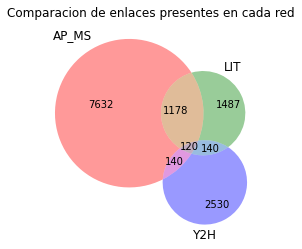

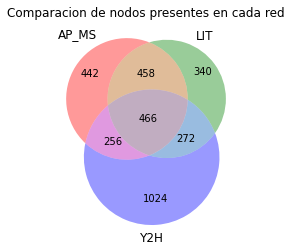

In [56]:
enlaces={}
nodos={}
for red in data:
    Red_proteinas=data[red]['Grafo']
    #Guardo enlaces y nodos en un set para poder hacer comparaciones facilmente
    enlaces[red], nodos[red] = set(), set()
    for nodo in Red_proteinas.nodes(): nodos[red].add(nodo)
    #Como los enlaces son NO dirigidos, los ordeno los nodos del enlace antes de guardarlo
    for enlace in Red_proteinas.edges(): enlace=sorted(enlace);enlaces[red].add((enlace[0],enlace[1]))

plt.title('Comparacion de enlaces presentes en cada red')
r_enlaces=venn_3(enlaces['AP_MS'],enlaces['LIT'],enlaces['Y2H'],"AP_MS","LIT","Y2H")

plt.title('Comparacion de nodos presentes en cada red')
r_nodos=venn_3(nodos['AP_MS'],nodos['LIT'],nodos['Y2H'],"AP_MS","LIT","Y2H")

In [57]:
import numpy as np
import pandas as pd

comparacion={}
i=0
for red in data:
    comparacion[red]={}
    comparacion[red]['Nodos (%)']=str(round(100*data[red]['Nodos']/np.sum(r_nodos),2))
    comparacion[red]['Enlaces (%)']=str(round(100*data[red]['Enlaces']/np.sum(r_enlaces),2))
    comparacion[red]['Nodos unicos (%)']=str(round(100*r_nodos[i]/np.sum(r_nodos),2))
    comparacion[red]['Enlaces unicos (%)']=str(round(100*r_enlaces[i]/np.sum(r_enlaces),2))
    i+= 1
comparacion['Interseccion']={}
comparacion['Interseccion']['Nodos (%)']=str(round(100*r_nodos[6]/np.sum(r_nodos),2))
comparacion['Interseccion']['Enlaces (%)']=str(round(100*r_enlaces[6]/np.sum(r_enlaces),2))
comparacion['Interseccion']['Nodos unicos (%)']='-'
comparacion['Interseccion']['Enlaces unicos (%)']='-'

pd.DataFrame(comparacion)

,AP_MS,LIT,Y2H,Interseccion
Nodos (%),49.79,47.15,61.94,14.3
Enlaces (%),68.57,22.11,22.15,0.91
Nodos unicos (%),13.57,10.44,31.43,-
Enlaces unicos (%),57.7,11.24,19.13,-


agregar desc de la tabla 
Analizar datos sobre cobertura (comparten nodos) y especificidad (comparten enlaces) y sobre la interseccion


466


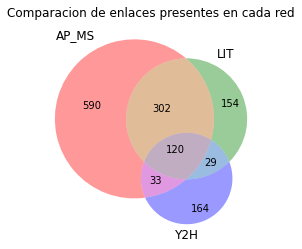

In [59]:
#De los nodos que coinciden, quiero ver si reportan los mismos enlaces:
nodos_interseccion= nodos['AP_MS'].intersection(nodos['LIT']).intersection(nodos['Y2H'])

print(len(nodos_interseccion))

interseccion={}
enlaces={}
nodos={}
for red in data:
    Red_proteinas=data[red]['Grafo']
    Red_proteinas_interseccion=Red_proteinas.subgraph(nodos_interseccion)
    
    #Guardo enlaces y nodos en un set para poder hacer comparaciones facilmente
    enlaces[red], nodos[red] = set(), set()
    for nodo in Red_proteinas_interseccion.nodes(): nodos[red].add(nodo)
    #Como los enlaces son NO dirigidos, los ordeno los nodos del enlace antes de guardarlo
    for enlace in Red_proteinas_interseccion.edges(): enlace=sorted(enlace);enlaces[red].add((enlace[0],enlace[1]))

plt.title('Comparacion de enlaces presentes en cada red')
r_enlaces_interseccion=venn_3(enlaces['AP_MS'],enlaces['LIT'],enlaces['Y2H'],"AP_MS","LIT","Y2H")

De las 466 proteinas sobre las cuales las tres redes aportan informacion, hay un total de 1392 interacciones reportadas, de las cuales 120 son reportadas por todas las redes. Tomando como medida de coherencia el porcentaje de interacciones en comun de las reportadas sobre esta muestra de enlaces de las 466 proteinas, podemos decir que la coherencia de las tres redes es de 8.62%.


Si en cambio tomaramos la coherencia como el porcentaje de enlaces en comun sobre el total de enlaces, tendriamos una coherencia de 0.91%.


# Ejercicio 2
En este ejercicio se busca estudiar una población de delfines y tratar de entender cómo son los vínculos entre dicha población y si dichos vínculos tienen que ver con el sexo de los delfines. Basicamente, queremos entender si la población de delfines es homofílica. La red social es no direccionada. 



## Inciso (a)
La idea de este inciso es explorar las distintas posibilidades de layout que nos otorga networkx en función de determinar cuál es la mejor para dar cuenta de la estructura subyacente a la red.
Existen múltilpes layouts, la idea es que probemos tres o cuatro. Algunos de ellos son: 'spring' (por default), 'random', 'circle', "spectral'.

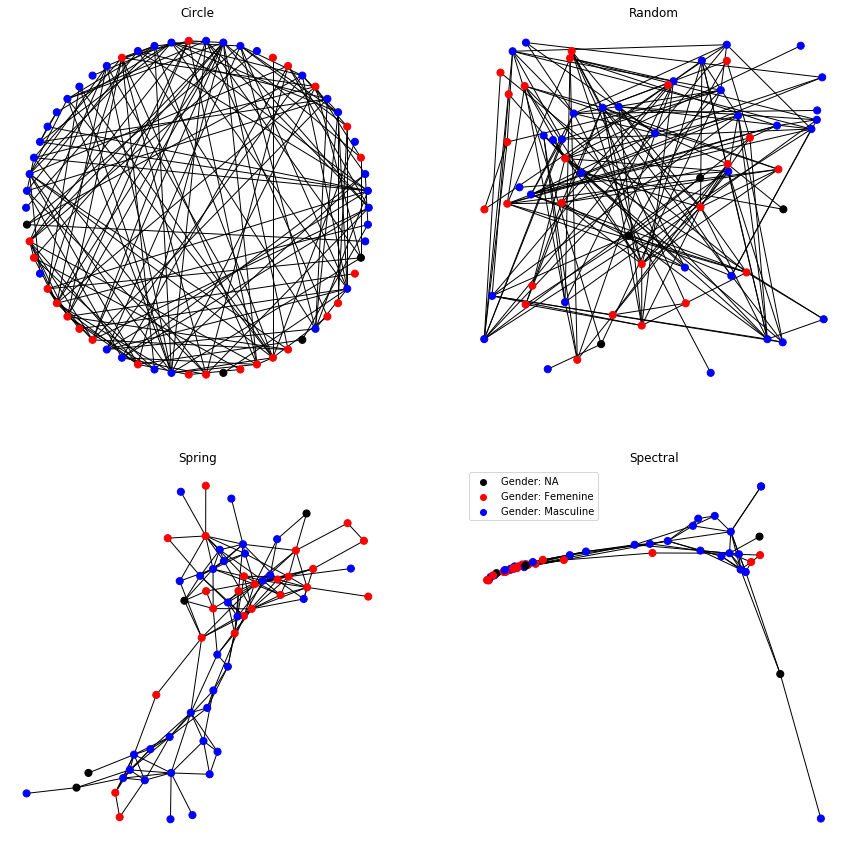

In [119]:
Red_delfines = nx.read_gml('./data_01/dolphins.gml')
dolphins_gender = abrir_txt('./data_01/dolphinsGender.txt')
gender_dict = dict(dolphins_gender)
nx.set_node_attributes(Red_delfines, gender_dict, 'gender')

node_color = []

for node in Red_delfines.nodes(data=True):
    if 'm' in node[1]['gender']:
        node_color.append('blue')
    
    elif 'f' in node[1]['gender']:
        node_color.append('red')
    
    elif 'NA' in node[1]['gender']:
        node_color.append('black')


f, axs = plt.subplots(2, 2, figsize=(15,15))
axs = axs.flatten()

nx.draw_circular(Red_delfines, node_size= 50, ax = axs[0], node_color=node_color)
axs[0].set_title("Circle")

nx.draw_random(Red_delfines, node_size= 50, ax = axs[1], node_color=node_color)
axs[1].set_title("Random")

nx.draw(Red_delfines, node_size= 50, ax = axs[2], node_color=node_color) #default
axs[2].set_title("Spring")

nx.draw_spectral(Red_delfines, node_size= 50, ax = axs[3], node_color=node_color)
axs[3].set_title("Spectral")


label = {'blue': 'Masculine', 'red':'Femenine', 'black':"NA"}
for color in set(node_color):
    plt.scatter([],[], c = color, label='Gender: {}'.format(label[color]))

plt.legend()
plt.show()


#circle reordenado

In [122]:
nx.node_connectivity(Red_delfines)

1

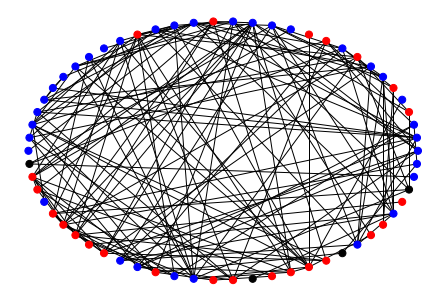

In [79]:
Red = Red_delfines.copy()
new_dict = {}
for k in sorted(gender_dict, key=gender_dict.get):
    k, gender_dict[k]
    new_dict[k] = gender_dict[k]

nx.set_node_attributes(Red, new_dict, 'gender')

node_color = []

for node in Red_delfines.nodes(data=True):
    if 'm' in node[1]['gender']:
        node_color.append('blue')
    
    elif 'f' in node[1]['gender']:
        node_color.append('red')
    
    elif 'NA' in node[1]['gender']:
        node_color.append('black')


nx.draw_circular(Red, node_size= 50,  node_color=node_color)



Acá ponemos la que más nos copa, con los colores de géneros y hablamos bla bla

## Inciso (b)
El objetivo de este inciso es ver si hay _homofilia_ en la variable género. Es decir, analizar la fracción de enlaces, sobre el total, que vincule delfines del mismo sexo. Se pueden contar los enlaces que vinculan macho con macho y los de hembra con hembra.

Para poder comprender la significancia de la cantidad (si este valor es grande o chico) necesitamos compararlo. Para eso se repite el cálculo sobre redes aleatorias. 

Pero enteniendo aleatoriedad en el sentido de romper algunas de las relaciones existentes en la red real pero no todas. Acá realizamos dos tipos: primero asignamos los géneros aleatoriamente entre los delfines, utilizando la distribución real de géneros. Otra posibilidad es recablear la red, manteniendo la distirbución de grado intacta.



Primero calculamos la cantidad de enlaces entre delfines de género masculino y femenino en la red real. Para lo mismo calculamos la matriz según atributos.

In [37]:
enlaces_original = nx.attr_matrix(Red_delfines, node_attr='gender', rc_order = ['f', 'm', 'NA'])
pares_fm = enlaces_original[0,1] #correspondiente a fem-masc, análogo a [1][0] masc-fem

print(f'Cantidad de pares entre genero femenino y masculino en la red original {pares_fm}')
enlaces_original

Cantidad de pares entre genero femenino y masculino en la red original 52.0


matrix([[36., 52.,  4.],
        [52., 60.,  7.],
        [ 4.,  7.,  0.]])

Luego, recableamos la red manteniendo el grado de cada nodo. Para lo mismo cambiamos entre pares de nodos. Hicimos lo mismo varias veces.

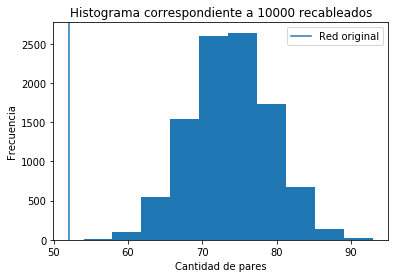

In [81]:
pares_de_enlaces_a_cambiar = 0.2*Red_delfines.number_of_edges()
Red_mezclada = Red_delfines.copy()

times = 10000
i = 0
new_pares_fm = []

while i < times:
    Red_mezclada = nx.double_edge_swap(Red_mezclada, nswap=pares_de_enlaces_a_cambiar, max_tries=100)
    enlaces_mezcla = nx.attr_matrix(Red_mezclada, node_attr='gender', rc_order = ['f', 'm', 'NA'])
    new_pares_fm.append(enlaces_mezcla[0,1])
    i=i+1

plt.figure()
plt.hist(new_pares_fm)
plt.xlabel('Cantidad de pares')
plt.ylabel('Frecuencia')
plt.title(f'Histograma correspondiente a {times} recableados')
plt.axvline(pares_fm, label = 'Red original')
plt.legend()
plt.show()


Volvimos a generar redes aleatorias, pero cambiando al azar los géneros. 

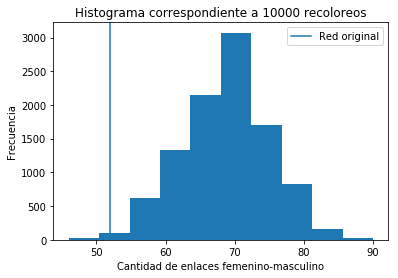

In [80]:
import random
new_net = Red_delfines.copy()
new_gender = gender_dict.copy()
keys = list(new_gender.keys())
new_gender_fm = []
i = 0
times = 10000
while i < times: 
  
    new_keys = random.sample(keys, len(keys))
    new_gender_dict = dict(zip(new_keys, new_gender.values()))
    nx.set_node_attributes(new_net, new_gender_dict, 'gender')
    enlaces_mezcla = nx.attr_matrix(new_net, node_attr='gender',
                                  rc_order = ['f', 'm', 'NA'])
    new_gender_fm.append(enlaces_mezcla[0,1])
    i=i+1

plt.figure()
plt.hist(new_gender_fm)
plt.xlabel('Cantidad de enlaces femenino-masculino')
plt.ylabel('Frecuencia')
plt.title(f'Histograma correspondiente a {times} recoloreos')
plt.axvline(pares_fm, label = 'Red original')
plt.legend()
plt.show()

# #TODO

ii. A partir de lo obtenido proponga una estimación para el valor y el error de dicha
cantidad cuando no existe vínculo entre topolgía de la red medio y asignación de
género. Compare su estimación con el valor medio esperado.
iii. Estime la significancia estadística (p-valor) del valor observado en el caso de la
red real.

## Inciso (c)
Identifique alguna metodología basada en observables topológicos para eliminar
nodos secuencialmente de la red de manera de dividirla en dos componentes de tamaños
comparables en el menor número de pasos. Explique y muestre los resultados obtenidos.
Intente cuantificar su estrategia comparándola con lo que se obtendría al eliminar nodos
de manera aleatoria


0 56 1
1 54 1
2 52 1
3 50 1
4 49 1
5 46 1
6 45 1
7 42 1
8 41 1
9 40 1
10 32 7
11 30 7
12 29 7
13 26 7
14 24 7
15 21 7
16 21 3
17 20 3
18 10 9
19 10 9
20 10 9
21 10 9
22 9 7
23 9 7
24 8 7
25 8 7
26 8 7
27 7 5
28 5 5
29 5 5
30 5 2
31 4 2
32 4 2
33 4 2
34 3 2
35 3 2
36 3 2
37 2 2
38 2 2
39 2 2
40 2 1
41 2 1
42 2 1
43 2 1
44 2 1
45 2 1
46 2 1
47 1 1
48 1 1
49 1 1
50 1 1
51 1 1
52 1 1
53 1 1
54 1 1
55 1 1
56 1 1


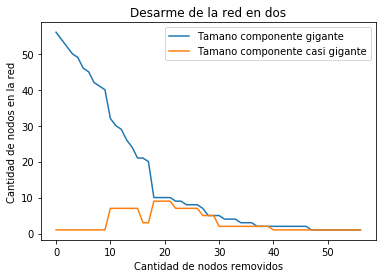

In [174]:
degrees = list(nx.degree(Red_delfines))
degree_dict = dict(degrees)
order_degree_dict = {}
for k in reversed(sorted(degree_dict, key=degree_dict.get)):
    k, degree_dict[k]
    order_degree_dict[k] = degree_dict[k]

tamano_gigante = []
tamano_casi_gigante = []
Red_rota = Red_delfines.copy()
i = 0

for node in order_degree_dict.keys():
    Red_rota.remove_node(node)
    componentes=[Red_rota.subgraph(componente) 
                      for componente in sorted(nx.connected_components(Red_rota), 
                                               key=len, reverse=True)]
    try:
        
        gigante = componentes[0]
        casi_gigante = componentes[1]
        tamano_gigante.append(gigante.number_of_nodes())
        tamano_casi_gigante.append(casi_gigante.number_of_nodes())
        print(i, gigante.number_of_nodes(), casi_gigante.number_of_nodes())
        i = i + 1
        
    except:
        pass
    
fig, ax = plt.subplots()
ax.plot(tamano_gigante, label = 'Tamano componente gigante')
ax.plot(tamano_casi_gigante, label = 'Tamano componente casi gigante')
ax.set_xlabel('Cantidad de nodos removidos')
ax.set_ylabel('Cantidad de nodos en la red')
plt.title('Desarme de la red en dos')
plt.legend()
plt.show()


## 4)


In [9]:
import numpy as np
Red_netscience = nx.read_gml('./data_01/netscience.gml')
Red_asjuly06 = nx.read_gml('./data_01/as-22july06.gml')

In [10]:
def asort(Red,title):
    asortatividad={} 
    for nodo_i in Red.nodes():
        #Calculo grado del nodo i
        grado_i=Red.degree[nodo_i]

        grado_vecinos_i=[]
        vecinos_nodo_i = Red.neighbors(nodo_i) # G.neighbors(node) devuelve un type iterator
        for vecino in vecinos_nodo_i:
          grado_vecinos_i.append(Red.degree[vecino])

        if len(grado_vecinos_i)==0: #no podemos hacer la media de un array vacio
            grado_medio_vecinos_i=0
        else:
            grado_medio_vecinos_i=np.mean(grado_vecinos_i)

        #Si ya existe la key con el grado, le appendeo el nuevo valor medio
        if grado_i in asortatividad:
            asortatividad[grado_i].append(grado_medio_vecinos_i)
        #Si no, creo la key
        else:	
            asortatividad[grado_i]=[grado_medio_vecinos_i]
    #Para cada grado calculo el promedio del promedio de los grados de los vecinos de cada nodo
    for grado in asortatividad:
        asortatividad[grado]=np.mean(asortatividad[grado])

    lists= sorted(asortatividad.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples

    #Saco el grado 0 si es que existe porque no aporta informacion y complica el analisis posterior con logaritmos
    if x[0]==0:
        x, y = x[1:],y[1:]
      
    plt.figure()
    plt.xlabel('Grado k')
    plt.ylabel('knn(k)')
    plt.title(title)
    plt.plot(x,y)
    plt.show()

    return(x,y)

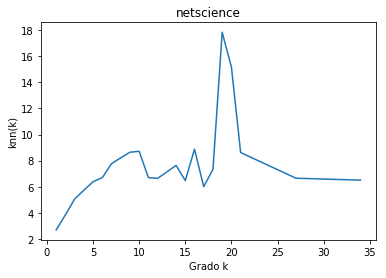

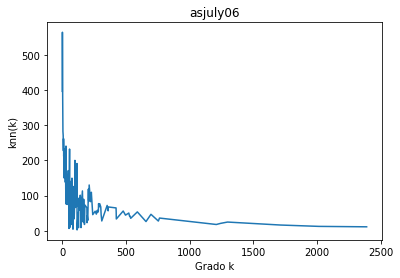

In [11]:
asortatividad_netscience=asort(Red_netscience,'netscience')
asortatividad_asjuly06=asort(Red_asjuly06,'asjuly06')

### ii)
En el caso de la red netscience tenemos asortatividad dado que nodos de bajo grado se relacionan con nodos de bajo grado, y el valor medio del grado de los vecinos (knn(k)) se va incrementando a medida que aumenta el grado. 

Contrariamente, en el caso de la red asjuly06 tenemos disasortatividad dado que nodos de bajo grado se relacionan con nodos de muy alto grado y el valor medio del grado de los vecinos (knn(k)) se va reuciendo a medida que aumenta el grado.

##ii.

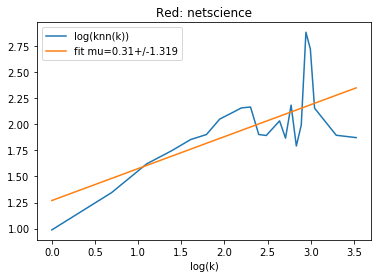

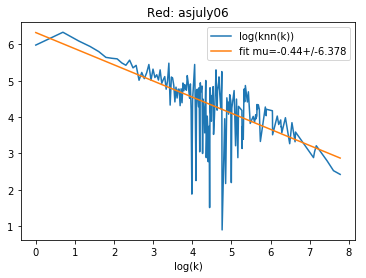

-0.4441735516734178

In [12]:
def exponente_correlacion(asortatividad):
    z=np.polyfit(np.log(asortatividad[0]), np.log(asortatividad[1]), 1)
    p=np.poly1d(z)
    mu=z[0]
    error_mu = z[1]
    #devuelve mu (factor de correlacion) y el fit lineal p
    return(mu,p,error_mu)

def fit_lineal_log(asortatividad,title):
    x_log=np.log(asortatividad[0])
    y_log=np.log(asortatividad[1])
    mu,p,error_mu=exponente_correlacion(asortatividad)
    fit=p(x_log)
    plt.plot(x_log,y_log, label='log(knn(k))')
    
    plt.plot(x_log,fit,label=f'fit mu={str(round(mu,2))+"+/-"+str(round(error_mu,3)+0.05)}')
    plt.xlabel('log(k)')
    plt.title(f'Red: {title}')
    plt.legend(loc='best')
    plt.show()
    return(mu)

fit_lineal_log(asortatividad_netscience,'netscience')
fit_lineal_log(asortatividad_asjuly06,'asjuly06')


##iv.

In [122]:
#http://math.sjtu.edu.cn/faculty/xiaodong/course/Networks%20An%20introduction.pdf
#Aca usamos la formula 8.28 y 8.29
def r_correlacion(red):
     
    Se, S1, S2, S3=0, 0, 0, 0    
    for enlace in red.edges():
        nodo_i=enlace[0]
        nodo_j=enlace[1]
        #Sumatoria sobre los enlaces distintos, de 2 ki kj
        Se += 2*red.degree[nodo_i]*red.degree[nodo_j] 

    for nodo in red.nodes():
        S1+=red.degree[nodo]
        S2+=red.degree[nodo]**2
        S3+=red.degree[nodo]**3

    r= (S1*Se - S2*S2)/ (S1*S3-S2*S2)
    
    return(r)

print(f'Red netscience: r={r_correlacion(Red_netscience)}')
print(f'Red asjuly06: r={r_correlacion(Red_asjuly06)}')


Red netscience: r=0.4616224667525835
Red asjuly06: r=-0.19838487512056477


## iv.

El valor de r es positivo para la red netscience que es asortativa, y negativo para la red asjuly06 que presenta disortatividad. 

Teniendo en cuenta que la red netscience corresponde a interacciones entre individuos de la comunidad cientifica y la red asjuly06 a las interacciones entre sistemas autonomos en internet, estos resultados coinciden con los recopilados en el libro de Newman:

<em>In Table 8.1 we show the values of r for a range of networks and the results reveal an interesting pattern.  While  none  of  the  values  are  of  very  large  magnitude—the  correlations  between  degrees  are  not  especially  strong—there  is  a  clear  tendency  for  the  social  networks  to  have  positive  r, indicating   assortative   mixing   by   degree,   while   the   rest   of   the   networks—technological,   information, biological—have negative r, indicating disassortative mixing.</em>

## b Correr el script para las redes de proteinas Y2H y AP_MS


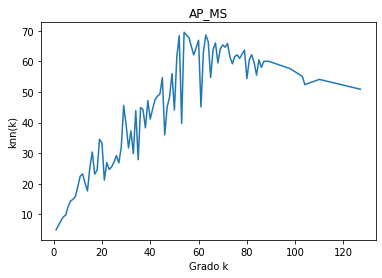

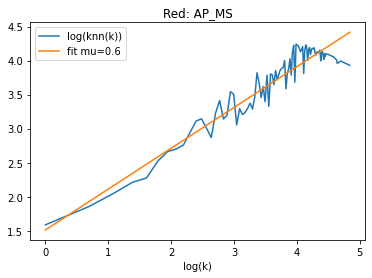

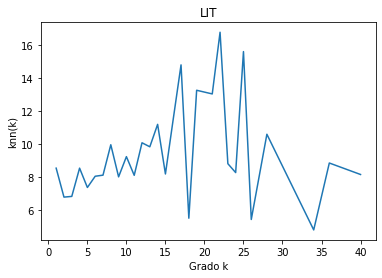

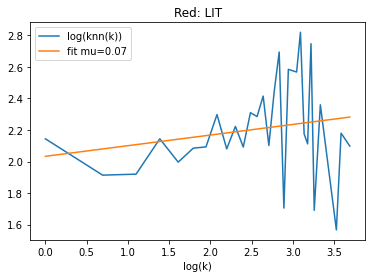

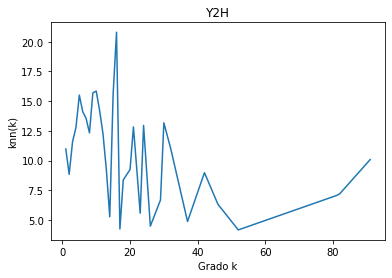

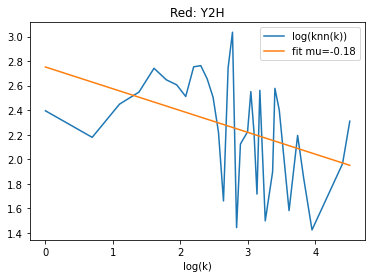

,AP_MS,LIT,Y2H
mu,0.599289,0.067444,-0.177580
r,0.605674,0.089308,-0.041067


In [134]:
def analisis_asortatividad(G):
    asortatividad=asort(G,red)
    mu=fit_lineal_log(asortatividad,red)
    r=r_correlacion(G)
    return(mu,r)

asortatividad_redes_proteinas={}

for red in data:
    mu,r = analisis_asortatividad(data[red]["Grafo"])
    asortatividad_redes_proteinas[red]={}
    asortatividad_redes_proteinas[red]['mu']=mu
    asortatividad_redes_proteinas[red]['r']=r
    
pd.DataFrame(asortatividad_redes_proteinas)

En el caso de las redes de proteinas AP_MS y LIT el comportamiento es asortativo, y en el caso de la red Y2H es disortativo. La explicacion en el caso de la res AP_MS podria venir del siguiente parrafo del libro de Newman:

<em> If  a  network  is  divided  up  into  tightly  knit  groups  of  vertices  that  are  mostly  disconnected  from  the  rest  of  the  network, then, as we have said, vertices in small groups tend to have lower degree than vertices in larger  groups.  But  since  the  members  of  small  groups  are  in  groups  with  other  members  of  the  same small groups, it follows that the low-degree vertices will tend to be connected to other low-degree  vertices,  and  similarly  for  high-degree  ones.  This  simple  idea  can  be  turned  into  a  quantitative  calculation  [252]  and  indeed  it  appears  that,  at  least  under  some  circumstances,  this  mechanism does produce positive values of r. 
    
Thus a possible explanation of the pattern of r-values seen in Table 8.1 is that most networks are naturally  disassortative  by  degree  because  they  are  simple  graphs  while  social  networks  (and  perhaps  a  few  others)  override  this  natural  bias  and  become  assortative  by  virtue  of  their  group  structure. </em>

En efecto la red AP_MS corresponde a estructuras de grupos debido a que identifica conjuntos de proteinas y no interacciones uno a uno de proteinas, en este sentido era esperable que el analisis de la asortatividad de la red demostrara en cierta manera su estructura de grupos.